# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [1]:
f_1 = lambda x: np.sign(x)*x +x*x
f_2 = lambda x: np.sign(x)*(x*x)
f_3 = lambda x: abs(np.sin(5*x))**3
f_41 = lambda x: 1/(1+1*x*x)           #dla a=1
f_42 = lambda x: 1/(1+25*x*x)          #dla a=25
f_43 = lambda x: 1/(1+100*x*x)         #dla a=100
f_5 = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

In [3]:
#from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
#f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
#x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
#interpolation_nodes_number = 1e1
#xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
#yimp = barycentric_interpolate(xch,f(xch),x)

#plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
#plt.plot(x,yimp,'r',label = 'interpolacja')
#plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
#plt.xlabel("x")
#plt.ylabel("y")
#plt.legend(loc = 0)
#plt.grid()
#plt.show()

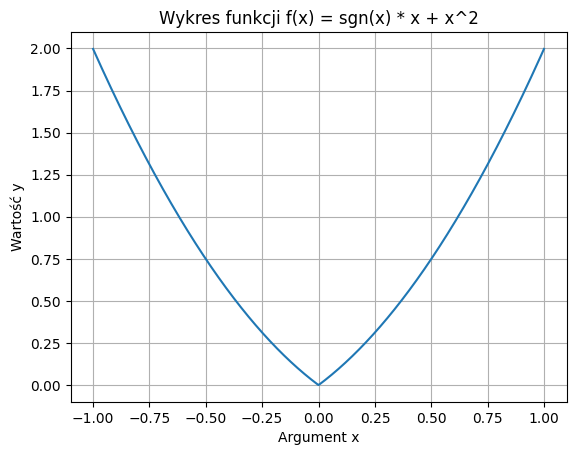

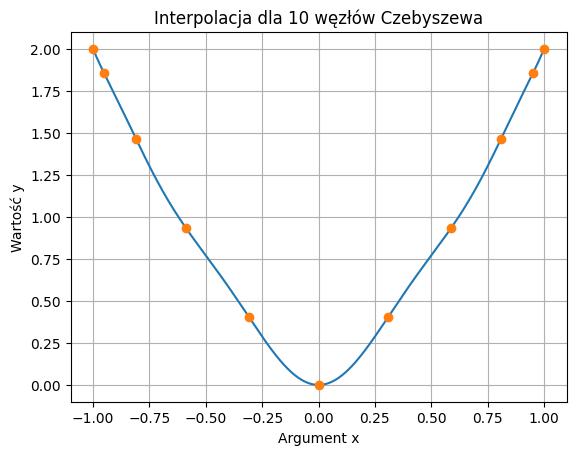

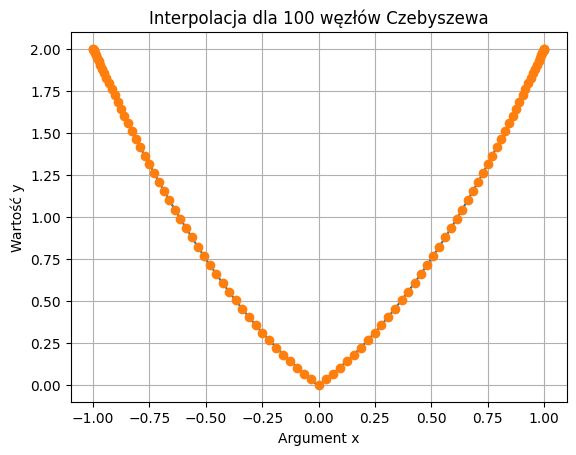

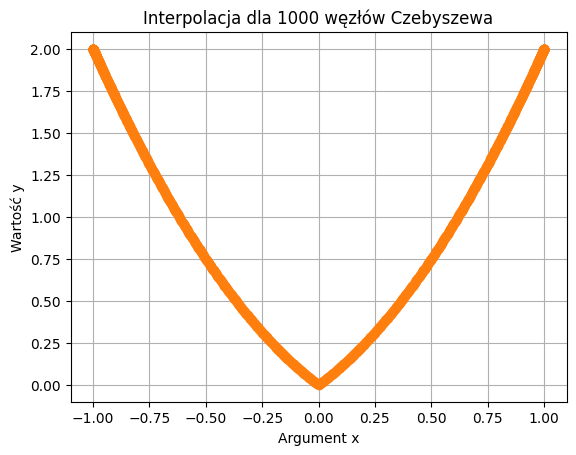

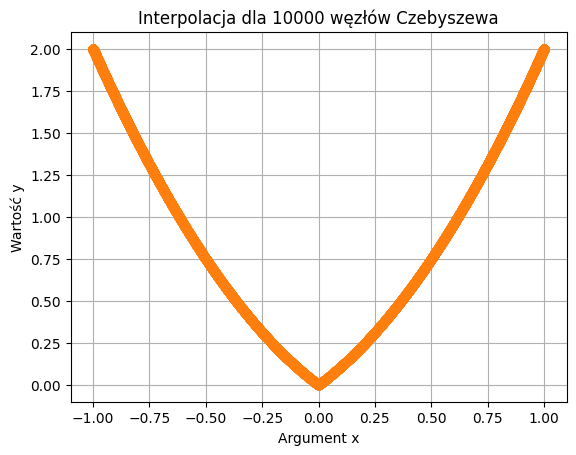

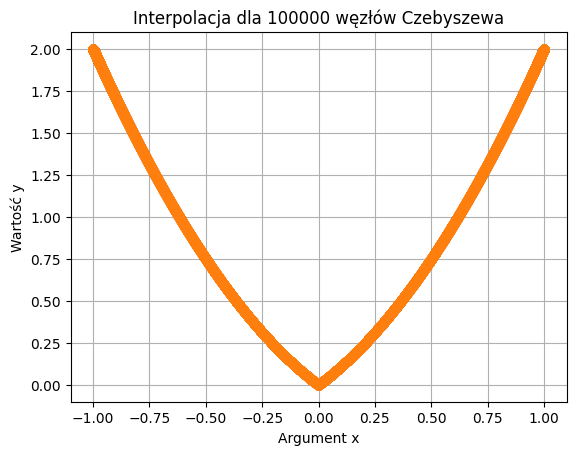

25.7 µs ± 10.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
91.9 µs ± 2.34 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.11 ms ± 391 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.53 ms ± 372 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [4]:
from scipy.interpolate import barycentric_interpolate
x = np.linspace(-0.999,0.999,1000)
y = f_1(x)
quality=[]


plt.plot(x, y)
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.title("Wykres funkcji f(x) = sgn(x) * x + x^2")
plt.grid()
plt.show()

#Dla 10 rzędu
nodes_10 = main.chebyshev_nodes(10)
weights_10 = main.bar_czeb_weights(10)
y_nodes10 = f_1(nodes_10)

yimp_10 = barycentric_interpolate(nodes_10, y_nodes10, x)
plt.plot(x, yimp_10)
plt.plot(nodes_10, y_nodes10, "o")
plt.title("Interpolacja dla 10 węzłów Czebyszewa")
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.grid()
plt.show()
quality.append(main.L_inf(yimp_10, y))

#Dla 100 rzędu
nodes_100 = main.chebyshev_nodes(100)
weights_100 = main.bar_czeb_weights(100)
y_nodes100 = f_1(nodes_100)

yimp_100 = barycentric_interpolate(nodes_100, y_nodes100, x)
plt.plot(x, yimp_100)
plt.plot(nodes_100, y_nodes100, "o")
plt.title("Interpolacja dla 100 węzłów Czebyszewa")
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.grid()
plt.show()
quality.append(main.L_inf(yimp_100, y))

#Dla 1000 rzędu
nodes_1000 = main.chebyshev_nodes(1000)
weights_1000 = main.bar_czeb_weights(1000)
y_nodes1000 = f_1(nodes_1000)

yimp_1000 = barycentric_interpolate(nodes_1000, y_nodes1000, x)
plt.plot(x, yimp_1000)
plt.plot(nodes_1000, y_nodes1000, "o")
plt.title("Interpolacja dla 1000 węzłów Czebyszewa")
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.grid()
plt.show()
quality.append(main.L_inf(yimp_1000, y))

#Dla 10000 rzędu
nodes_10000 = main.chebyshev_nodes(10000)
weights_10000 = main.bar_czeb_weights(10000)
y_nodes10000 = f_1(nodes_10000)

yimp_10000 = barycentric_interpolate(nodes_10000, y_nodes10000, x)
plt.plot(x, yimp_10000)
plt.plot(nodes_10000, y_nodes10000, "o")
plt.title("Interpolacja dla 10000 węzłów Czebyszewa")
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.grid()
plt.show()
quality.append(main.L_inf(yimp_10000, y))

#Dla 100000 rzędu 
nodes_100000 = main.chebyshev_nodes(100000)
weights_100000 = main.bar_czeb_weights(100000)
y_nodes100000 = f_1(nodes_100000)

yimp_100000 = barycentric_interpolate(nodes_100000, y_nodes100000, x)
plt.plot(x, yimp_100000)
plt.plot(nodes_100000, y_nodes100000, "o")
plt.title("Interpolacja dla 100000 węzłów Czebyszewa")
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.grid()
plt.show()
quality.append(main.L_inf(yimp_100000, y))

n = [10, 100, 1000, 10000]
time_avg = np.zeros([len(n)])
time_std = np.zeros([len(n)])

for i in range(len(n)):
    interpolation_nodes_number = n[i]
    xxh = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)
    saved_timing = %timeit -r 5 -n 10 -o main.barycentric_inte(xxh,f_1(xxh),main.bar_czeb_weights(interpolation_nodes_number),x)
    time_avg[i] = saved_timing.average
    time_std[i] = saved_timing.stdev


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [5]:
n_number = 1
for i in quality:
    n_number=n_number*10
    print('Dokładność interpolacji dla {} węzłów wynosi {}'.format(n_number, i))

Dokładność interpolacji dla 10 węzłów wynosi 0.059219295019628054
Dokładność interpolacji dla 100 węzłów wynosi 0.005965676863805159
Dokładność interpolacji dla 1000 węzłów wynosi 0.00057378742741681
Dokładność interpolacji dla 10000 węzłów wynosi 8.185222389133981e-06
Dokładność interpolacji dla 100000 węzłów wynosi 7.949825898165112e-08


***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

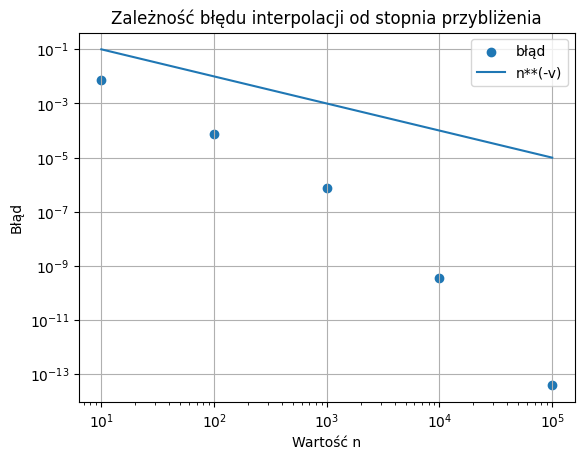

Dokładność funkcji dla 10 rzędu wynosi 0.007616115960594682
Dokładność funkcji dla 100 rzędu wynosi 7.531807161925999e-05
Dokładność funkcji dla 1000 rzędu wynosi 7.479926723332816e-07
Dokładność funkcji dla 10000 rzędu wynosi 3.602589902830211e-10
Dokładność funkcji dla 100000 rzędu wynosi 3.931099559371584e-14


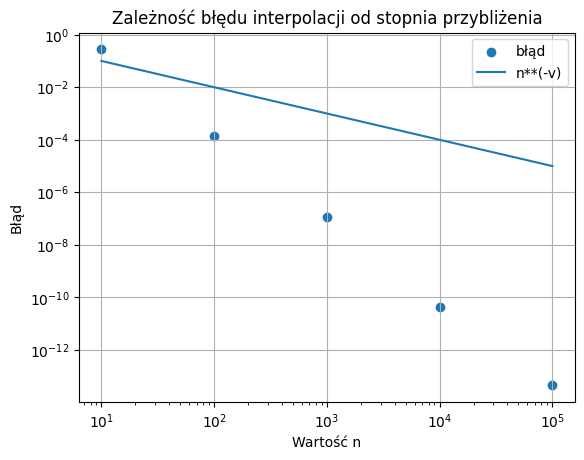

Dokładność funkcji dla 10 rzędu wynosi 0.2770996853874699
Dokładność funkcji dla 100 rzędu wynosi 0.0001431519904893907
Dokładność funkcji dla 1000 rzędu wynosi 1.1896055857948268e-07
Dokładność funkcji dla 10000 rzędu wynosi 4.5032501782987985e-11
Dokładność funkcji dla 100000 rzędu wynosi 4.54081217071689e-14


In [10]:
#Funkcja sign(x)*x**2
x = np.linspace(-0.999, 0.999, 1000)
y=f_2(x)
quality = []
n_pow = []
accuracy = [10, 100, 1000, 10000, 100000]
for i in range(0,5):
    nodes = accuracy[i]
    x_nodes = main.chebyshev_nodes(nodes)
    y_nodes = f_2(x_nodes)
    weights = main.bar_czeb_weights(nodes)
    yinp = main.barycentric_inte(x_nodes,y_nodes,weights,x)
    quality.append(main.L_inf(y, yinp))
    n_pow.append(1/nodes)

n = np.array([10,100,1000,10000,100000])
fig, ax = plt.subplots()
ax.scatter(n, quality, label = 'błąd')
ax.plot(n, n_pow, label = 'n**(-v)')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("Zależność błędu interpolacji od stopnia przybliżenia")
plt.xlabel("Wartość n")
plt.ylabel("Błąd")
plt.grid()
plt.show()


j = 1
for i in quality:
    j = j*10
    print('Dokładność funkcji dla {} rzędu wynosi {}'.format(j, i))

#Funkcja |sign(5x)|**3

x = np.linspace(-0.999, 0.999, 1000)
y=f_3(x)
quality = []
n_pow = []
accuracy = [10, 100, 1000, 10000, 100000]
for i in range(0,5):
    nodes = accuracy[i]
    x_nodes = main.chebyshev_nodes(nodes)
    y_nodes = f_3(x_nodes)
    weights = main.bar_czeb_weights(nodes)
    yinp = main.barycentric_inte(x_nodes,y_nodes,weights,x)
    quality.append(main.L_inf(y, yinp))
    n_pow.append(1/nodes)

n = np.array([10,100,1000,10000,100000])
fig, ax = plt.subplots()
ax.scatter(n, quality, label = 'błąd')
ax.plot(n, n_pow, label = 'n**(-v)')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("Zależność błędu interpolacji od stopnia przybliżenia")
plt.xlabel("Wartość n")
plt.ylabel("Błąd")
plt.grid()
plt.show()


j = 1
for i in quality:
    j = j*10
    print('Dokładność funkcji dla {} rzędu wynosi {}'.format(j, i))

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

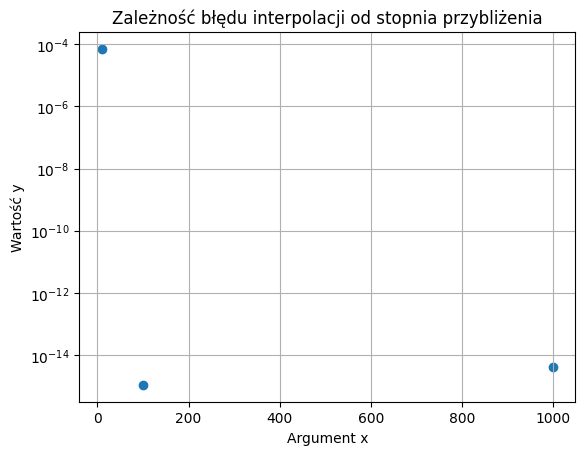

C:\Users\olasl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


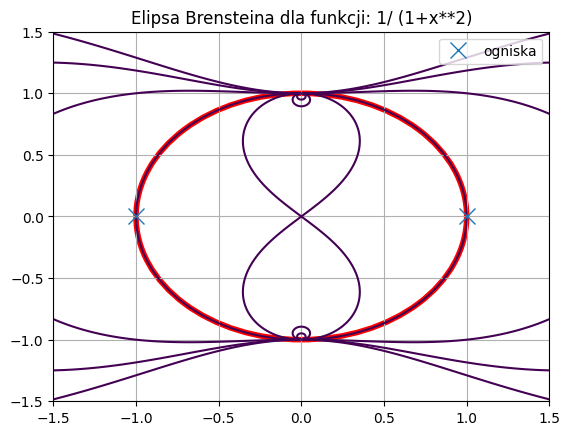

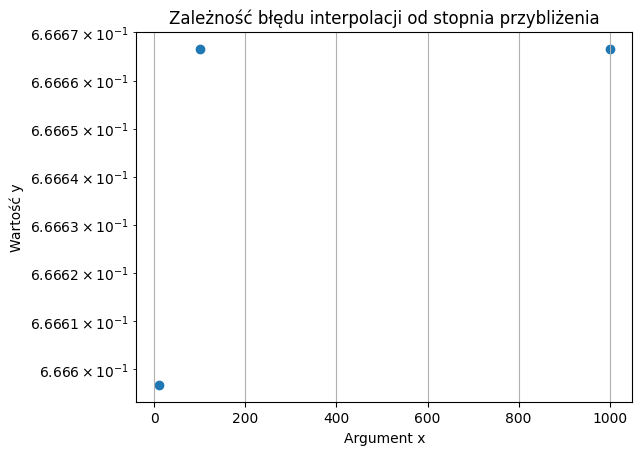

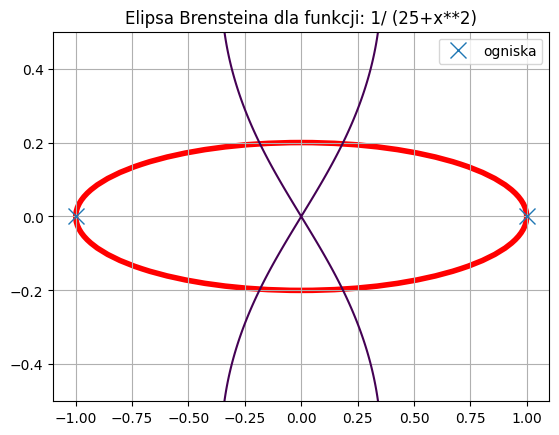

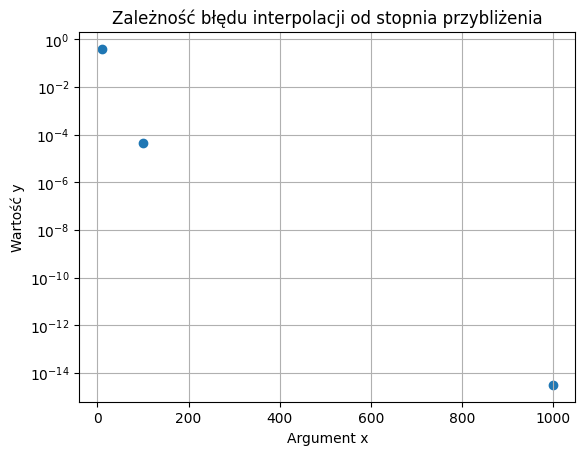

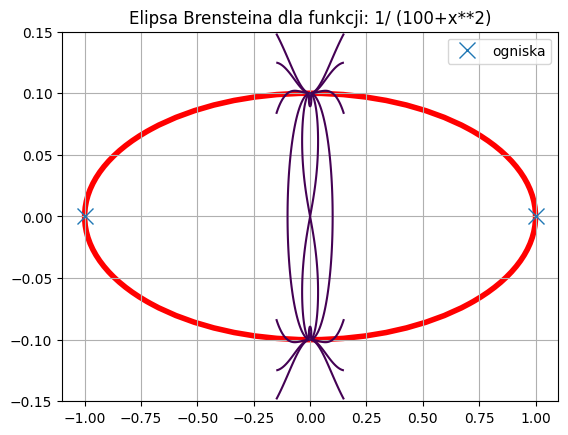

In [8]:
#Dla a=1
x = np.linspace(-0.999, 0.999, 1000)
y=f_41(x)
norm = list()
accuracy = [10, 100, 1000]
for n in accuracy:
    czeb = main.bar_czeb_weights(n)
    x_node = main.chebyshev_nodes(n)
    y_node = f_41(x_node)
    yinp = main.barycentric_inte(x_node, y_node, czeb, x)
    norm.append(main.L_inf(y, yinp))
plt.scatter(accuracy, norm)
plt.yscale("log")
plt.title("Zależność błędu interpolacji od stopnia przybliżenia")
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.grid()
plt.show()

x_1 = np.linspace(-1.5, 1.5, 1000)
y_1 = np.linspace(-1.5, 1.5, 1000)
X, Y = np.meshgrid(x_1, y_1)
Z = f_41(X + 1j * Y)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=1
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None', lw=4)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa Brensteina dla funkcji: 1/ (1+x**2)")
ax.legend()
plt.grid()
plt.show()

#Dla a=25
x = np.linspace(-0.999, 0.999, 1000)
y=f_42(x)
norm = list()
accuracy = [10, 100, 1000]
for n in accuracy:
    czeb = main.bar_czeb_weights(n)
    x_node = main.chebyshev_nodes(n)
    y_node = f_41(x_node)
    yinp = main.barycentric_inte(x_node, y_node, czeb, x)
    norm.append(main.L_inf(y, yinp))
plt.scatter(accuracy, norm)
plt.yscale("log")
plt.title("Zależność błędu interpolacji od stopnia przybliżenia")
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.grid()
plt.show()

x_2 = np.linspace(-0.5, 0.5, 1000)
y_2 = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_2, y_2)
Z = f_41(X + 1j * Y)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=0.2
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None', lw=4)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa Brensteina dla funkcji: 1/ (25+x**2)")
ax.legend()
plt.grid()
plt.show()

#Dla a=100
# x = np.linspace(-0.999, 0.999, 1000)
y=f_43(x)
norm = list()
accuracy = [10, 100, 1000]
for n in accuracy:
    czeb = main.bar_czeb_weights(n)
    x_node = main.chebyshev_nodes(n)
    y_node = f_43(x_node)
    yinp = main.barycentric_inte(x_node, y_node, czeb, x)
    norm.append(main.L_inf(y, yinp))
plt.scatter(accuracy, norm)
plt.yscale("log")
plt.title("Zależność błędu interpolacji od stopnia przybliżenia")
plt.xlabel("Argument x")
plt.ylabel("Wartość y")
plt.grid()
plt.show()

x_3 = np.linspace(-.15, 0.15, 1000)
y_3 = np.linspace(-0.15, 0.15, 1000)
X, Y = np.meshgrid(x_3, y_3)
Z = f_43(X + 1j * Y)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=0.1
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None', lw=4)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa Brensteina dla funkcji: 1/ (100+x**2)")
ax.legend()
plt.grid()
plt.show()


***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

C:\Users\olasl\AppData\Local\Temp\ipykernel_1816\1009823040.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, yinp, "y", color="r")


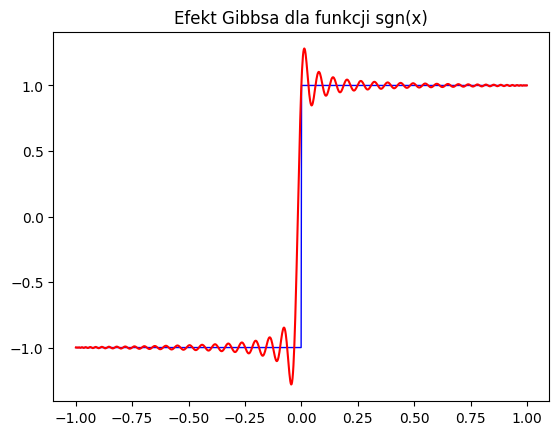

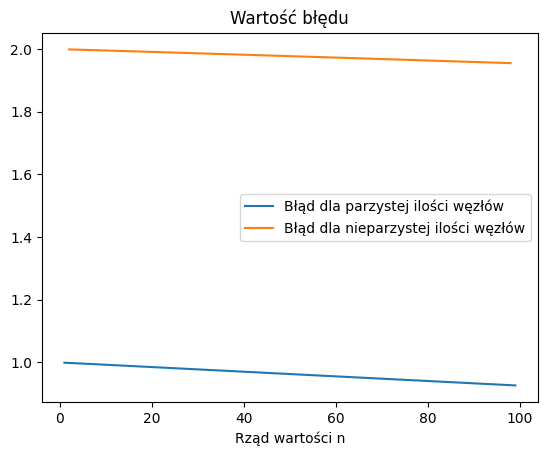

In [9]:
x = np.linspace(-0.999, 0.999, 1000)
y = f_5(x)
norm = list()
n = 100
err_odd = []
err_even = []
x_even = []
x_odd = []
for i in range(1,n):
    weights = main.bar_czeb_weights(i)
    nodes = main.chebyshev_nodes(i)
    y_nodes = f_5(nodes)
    yinp = main.barycentric_inte(nodes, y_nodes, weights, x)
    if i % 2 == 0:
        err_even.append(main.L_inf(yinp, y))
        x_even.append(i)
    else:
        err_odd.append(main.L_inf(yinp, y))
        x_odd.append(i)
weights = main.bar_czeb_weights(100)
nodes = main.chebyshev_nodes(100)
y_nodes = f_5(nodes)
yinp = main.barycentric_inte(nodes, y_nodes, weights, x)
czeb_w = main.bar_czeb_weights(n)
x_node = main.chebyshev_nodes(n)
y_node = f_5(x_node)
yinp = main.barycentric_inte(x_node, y_node, czeb_w, x)
norm.append(main.L_inf(y, yinp))

plt.plot(x, y, linewidth=1, color="b")
plt.title("Efekt Gibbsa dla funkcji sgn(x)")
plt.plot(x, yinp, "y", color="r")

fig, ax = plt.subplots() 
ax.plot(x_odd, err_odd, label = 'Błąd dla parzystej ilości węzłów')
ax.plot(x_even, err_even, label = 'Błąd dla nieparzystej ilości węzłów')
plt.legend()
plt.title('Wartość błędu')
plt.xlabel('Rząd wartości n')
plt.show()

Wartości dla parzystych i nieparzystych n się różnią, wynika to z zaokrąglenia rozmieszczenia węzłów, które znajdują się w połowie. Wszystkie węzły występujące dokładnie w połowie są przesuniętne w dodatnią stronę przez co błąd jest generowany ze względu na błędną aproksymację wartości tych punktów w funkcji nieciągłej.

*Wnioski*

Podczas tego labolatorium zapoznałam się z tworzeniem interpolacji przy użyciu węzłów Czebyszewa, a także z wbudowaną z pakietu Scipy funkcją do interpolacji barycentric_interpolate. Do oceny jakości interpolacji potrzebna była norma L_inf, która służyła do obliczenia maksymalnej bezwzględnej różnicy wartości interpolacji i funkcji orygnajlnej.     

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)